<a href="https://colab.research.google.com/github/khuliso-ML/MidTerm_KhulisoMukwevho_ITAI1371.pdf/blob/MidTerm_KhulisoMukwevho_ITAI1371/MidTermDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
path="/content/drive/MyDrive/Datasets/Datasetapproved.csv"
df=pd.read_csv(path)
display(df)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [1]:
import os
print(os.listdir('/content'))

['.config', 'drive', 'sample_data']


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1️⃣ Load Dataset
# Corrected file path
df = pd.read_csv("/content/drive/MyDrive/Datasets/Datasetapproved.csv")
print("Initial shape:", df.shape)
print(df.head())

# 2️⃣ Drop unwanted columns
# Based on the dataframe displayed previously, the column names are different.
# I will adjust the column names to drop based on the actual column names in the dataframe.
cols_to_drop = ['fasting_blood_sugar', 'rest_ecg', 'vessels_colored_by_flourosopy']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')
print("After dropping specified columns:", df.shape)

# 3️⃣ Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
print("After dropping duplicates:", df.shape)

# 4️⃣ Feature Engineering (examples)
#    You can customize these if you have more relevant domain knowledge
if 'age' in df.columns:
    df['age_category'] = pd.cut(df['age'],
                                bins=[0, 30, 50, 70, np.inf],
                                labels=['Young','Middle','Senior','VerySenior'])

# Adjusting column names for interaction term based on actual column names
if 'cholestoral' in df.columns and 'resting_blood_pressure' in df.columns:
    df['chol_trestbps_interaction'] = df['cholestoral'] * df['resting_blood_pressure']
print("After feature engineering:", df.shape)

# 5️⃣ Fill Missing / Null Values
print("Missing values before filling:\n", df.isnull().sum())
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode().iloc[0])
print("Missing values after filling:\n", df.isnull().sum())

# 6️⃣ Identify Categorical & Numerical Columns
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
# Exclude the target column if it's in numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'target' in num_cols:
    num_cols.remove('target')

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)


# 7️⃣ Encoding (One-Hot for categorical)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols) # Added handle_unknown='ignore'
    ],
    remainder='passthrough' # Keep other columns (like target)
)

# 8️⃣ Scaling + Normalization
pipeline = Pipeline(steps=[
    ('preproc', preprocessor),
    ('scaler', StandardScaler()), # Added StandardScaler
    ('normalizer', MinMaxScaler()) # Added MinMaxScaler for normalization
])


# Apply transformations
X_processed = pipeline.fit_transform(df)

# 9️⃣ Convert transformed data back to DataFrame
# Get feature names AFTER preprocessing but BEFORE scaling/normalization
preprocessor_output_columns = preprocessor.get_feature_names_out(df.columns)

# The scaler and normalizer don't change column names from the preprocessor output
df_clean = pd.DataFrame(X_processed, columns=preprocessor_output_columns)


# 🔟 Add target column back if present
# The remainder='passthrough' in ColumnTransformer should handle this.
# Let's verify if 'target' is in the cleaned dataframe columns

if 'target' in df_clean.columns:
    print("'target' column is in the cleaned dataframe.")
else:
     # If 'target' was not in the original cat_cols or num_cols and not handled by remainder, add it back.
     if 'target' in df.columns:
          df_clean['target'] = df['target'].values
          print("Added 'target' column back to the cleaned dataframe.")


# ✅ Save cleaned dataset
df_clean.to_csv("/content/Cleaned_Datasetapproved.csv", index=False)
print("Cleaned dataset saved as Cleaned_Datasetapproved.csv")
print("Final shape:", df_clean.shape)

# Display the first few rows of the cleaned dataframe
display(df_clean.head())

Initial shape: (1025, 14)
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping          

,num__age,num__resting_blood_pressure,num__cholestoral,num__Max_heart_rate,num__oldpeak,num__chol_trestbps_interaction,cat__sex_Male,cat__chest_pain_type_Atypical angina,cat__chest_pain_type_Non-anginal pain,cat__chest_pain_type_Typical angina,...,cat__slope_Flat,cat__slope_Upsloping,cat__thalassemia_No,cat__thalassemia_Normal,cat__thalassemia_Reversable Defect,cat__age_category_Senior,cat__age_category_VerySenior,cat__age_category_Young,remainder__target,target
0,0.479167,0.292453,0.196347,0.740458,0.161290,0.227112,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,0.500000,0.433962,0.175799,0.641221,0.500000,0.265796,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,0.854167,0.481132,0.109589,0.412214,0.419355,0.201523,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,0.666667,0.509434,0.175799,0.687023,0.000000,0.298517,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0.687500,0.415094,0.383562,0.267176,0.306452,0.510638,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [15]:
from sklearn.model_selection import train_test_split

# Load the cleaned dataset (if not already loaded)
try:
    df_clean.head()
except NameError:
    df_clean = pd.read_csv("/content/Cleaned_Datasetapproved.csv")


# Separate features (X) and target (y)
# Assuming 'target' is the column you want to predict
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (241, 20)
Shape of X_test: (61, 20)
Shape of y_train: (241,)
Shape of y_test: (61,)


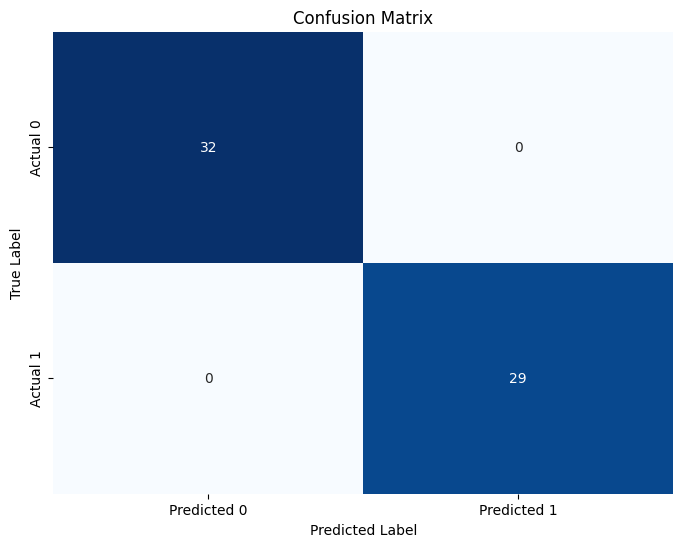

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and made predictions (y_test, y_pred)
# If not, please run the previous cells to train the model.

# Calculate the confusion matrix
# matrix = confusion_matrix(y_test, y_pred) # This was already calculated in the previous cell

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", matrix)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        29

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61


Confusion Matrix:
 [[32  0]
 [ 0 29]]


In [22]:
# Load the cleaned dataset (if not already loaded)
try:
    df_clean.head()
except NameError:
    df_clean = pd.read_csv("/content/Cleaned_Datasetapproved.csv")

# Calculate the correlation matrix (if not already calculated)
try:
    correlation_matrix.head()
except NameError:
    correlation_matrix = df_clean.corr()


# Get the correlations with the target variable
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

# Remove the correlation of the target variable with itself
target_correlation = target_correlation.drop('target')

print("Features most correlated with the target variable:")
display(target_correlation)

Features most correlated with the target variable:


,target
remainder__target,1.000000
num__Max_heart_rate,0.419955
cat__chest_pain_type_Non-anginal pain,0.313696
cat__chest_pain_type_Atypical angina,0.247649
cat__age_category_VerySenior,0.082967
cat__age_category_Young,0.052873
cat__thalassemia_No,-0.007056
cat__slope_Upsloping,-0.062822
num__cholestoral,-0.081437
cat__thalassemia_Normal,-0.105986


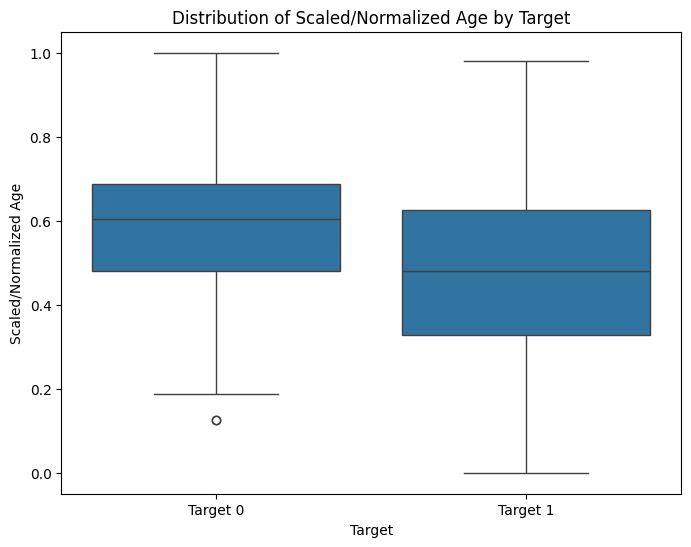

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (if not already loaded)
try:
    df_clean.head()
except NameError:
    df_clean = pd.read_csv("/content/Cleaned_Datasetapproved.csv")

# Visualize the relationship between 'num__age' and 'target' using a box plot
if 'num__age' in df_clean.columns and 'target' in df_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_clean, x='target', y='num__age')
    plt.title('Distribution of Scaled/Normalized Age by Target')
    plt.xlabel('Target')
    plt.ylabel('Scaled/Normalized Age')
    plt.xticks([0, 1], ['Target 0', 'Target 1']) # Label the x-axis ticks
    plt.show()
else:
    print("Required columns ('num__age' or 'target') not found in df_clean.")

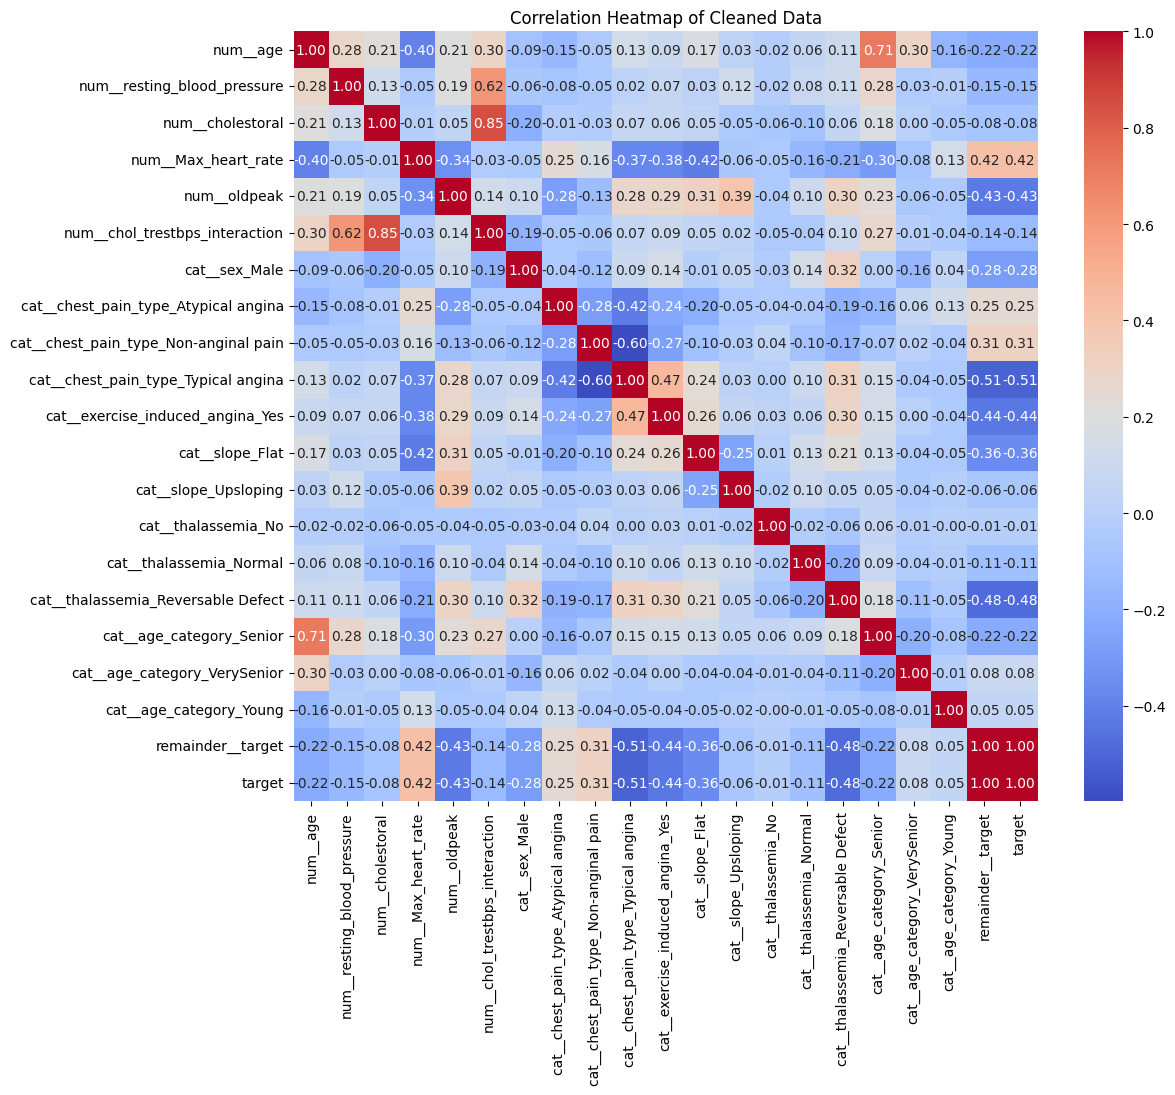

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (if not already loaded)
try:
    df_clean.head()
except NameError:
    df_clean = pd.read_csv("/content/Cleaned_Datasetapproved.csv")

# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Cleaned Data')
plt.show()

In [20]:
# Load the cleaned dataset (if not already loaded)
try:
    df_clean.head()
except NameError:
    df_clean = pd.read_csv("/content/Cleaned_Datasetapproved.csv")

# Display descriptive statistics for numerical columns
display(df_clean.describe())

# Display information about the DataFrame (data types, non-null counts)
df_clean.info()

,num__age,num__resting_blood_pressure,num__cholestoral,num__Max_heart_rate,num__oldpeak,num__chol_trestbps_interaction,cat__sex_Male,cat__chest_pain_type_Atypical angina,cat__chest_pain_type_Non-anginal pain,cat__chest_pain_type_Typical angina,...,cat__slope_Flat,cat__slope_Upsloping,cat__thalassemia_No,cat__thalassemia_Normal,cat__thalassemia_Reversable Defect,cat__age_category_Senior,cat__age_category_VerySenior,cat__age_category_Young,remainder__target,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.529594,0.354742,0.275114,0.599767,0.168233,0.349080,0.682119,0.165563,0.284768,0.473510,...,0.463576,0.069536,0.006623,0.059603,0.387417,0.668874,0.019868,0.003311,0.543046,0.543046
std,0.188499,0.165692,0.118159,0.174836,0.187331,0.172859,0.466426,0.372305,0.452053,0.500126,...,0.499499,0.254786,0.081244,0.237142,0.487969,0.471399,0.139777,0.057544,0.498970,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.245283,0.194064,0.475191,0.000000,0.225600,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.552083,0.339623,0.261416,0.622137,0.129032,0.333394,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,0.666667,0.433962,0.339612,0.725191,0.258065,0.435344,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   num__age                               302 non-null    float64
 1   num__resting_blood_pressure            302 non-null    float64
 2   num__cholestoral                       302 non-null    float64
 3   num__Max_heart_rate                    302 non-null    float64
 4   num__oldpeak                           302 non-null    float64
 5   num__chol_trestbps_interaction         302 non-null    float64
 6   cat__sex_Male                          302 non-null    float64
 7   cat__chest_pain_type_Atypical angina   302 non-null    float64
 8   cat__chest_pain_type_Non-anginal pain  302 non-null    float64
 9   cat__chest_pain_type_Typical angina    302 non-null    float64
 10  cat__exercise_induced_angina_Yes       302 non-null    float64
 11  cat__s

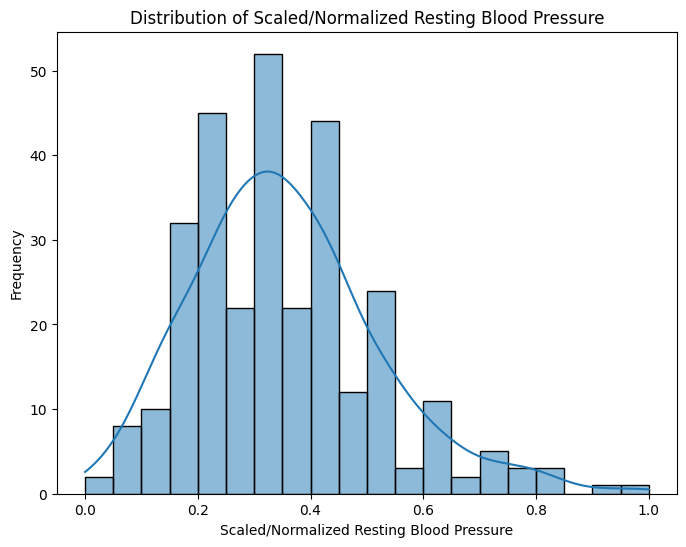

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (if not already loaded)
try:
    df_clean.head()
except NameError:
    df_clean = pd.read_csv("/content/Cleaned_Datasetapproved.csv")

# Visualize the distribution of the 'num__resting_blood_pressure' column
if 'num__resting_blood_pressure' in df_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_clean, x='num__resting_blood_pressure', bins=20, kde=True)
    plt.title('Distribution of Scaled/Normalized Resting Blood Pressure')
    plt.xlabel('Scaled/Normalized Resting Blood Pressure')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'num__resting_blood_pressure' column not found in df_clean.")

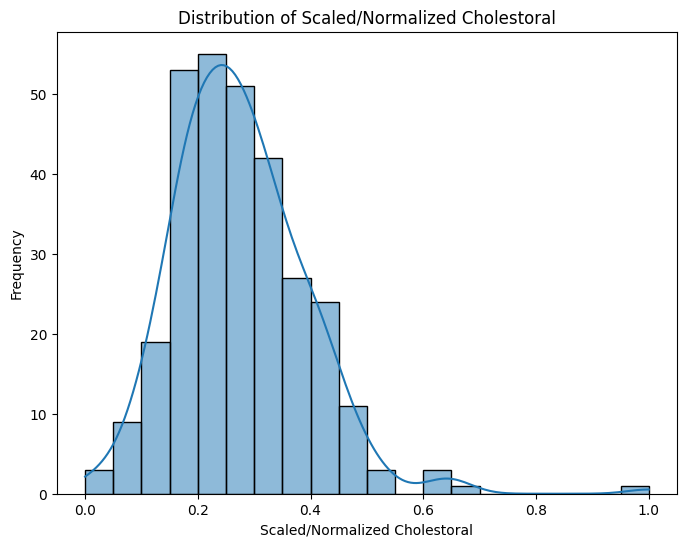

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (if not already loaded)
try:
    df_clean.head()
except NameError:
    df_clean = pd.read_csv("/content/Cleaned_Datasetapproved.csv")

# Visualize the distribution of the 'num__cholestoral' column
if 'num__cholestoral' in df_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_clean, x='num__cholestoral', bins=20, kde=True)
    plt.title('Distribution of Scaled/Normalized Cholestoral')
    plt.xlabel('Scaled/Normalized Cholestoral')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'num__cholestoral' column not found in df_clean.")

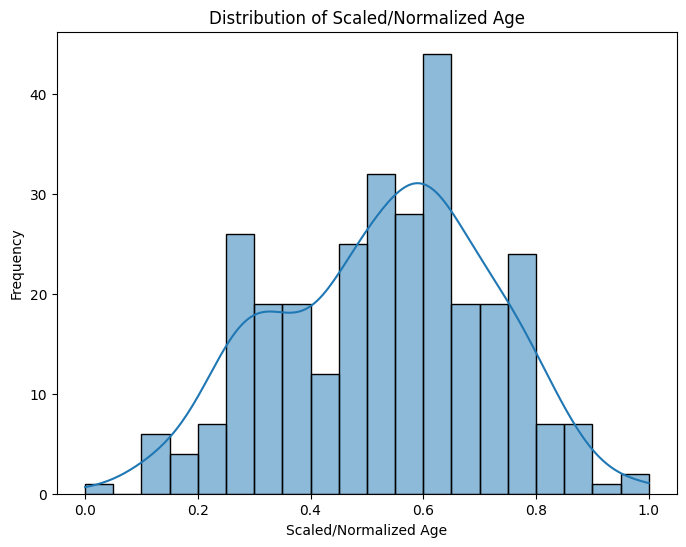

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (if not already loaded)
try:
    df_clean.head()
except NameError:
    df_clean = pd.read_csv("/content/Cleaned_Datasetapproved.csv")

# Assuming 'num__age' is the scaled/normalized age column in df_clean
# If you want to visualize the original age distribution, use the original df before cleaning
# Let's visualize the distribution of the preprocessed 'num__age' column
if 'num__age' in df_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_clean, x='num__age', bins=20, kde=True)
    plt.title('Distribution of Scaled/Normalized Age')
    plt.xlabel('Scaled/Normalized Age')
    plt.ylabel('Frequency')
    plt.show()
elif 'age' in df_clean.columns:
     # Fallback if num__age is not found, visualize the age column if it exists
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_clean, x='age', bins=20, kde=True)
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Neither 'num__age' nor 'age' column found in df_clean.")